In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_10degree = pd.read_csv('x_10degree_1rev.csv',header=None)

In [5]:
x_10degree = x_10degree.to_numpy(dtype='float32')

In [6]:
x = x_10degree[:, 0:15]

In [7]:
x = x.reshape((37*6, n_sensors, 1))

In [8]:
y_10degree = pd.read_csv('y_output(1rev_10deg).csv',header=None)

In [9]:
os.chdir('C:\\Users\\User')

In [10]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [11]:
y = y_10degree.reshape((37*6, 100, 100))

In [12]:
tsr = x_10degree[:, -2]

In [13]:
theta = x_10degree[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(199, 100, 100)


In [16]:
print(y_test.shape)

(23, 100, 100)


In [17]:
print(x_train.shape)

(199, 15, 1)


In [18]:
print(x_test.shape)

(23, 15, 1)


In [19]:
theta_train.shape

(199,)

In [20]:
tsr_train.shape

(199,)

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_time = tf.keras.Input(shape=(2))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=64, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=64, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=64, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=64, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [23]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 64)               192       
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 64)               4160      
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 64)               4160      
 se)                                                             
                                                             

In [24]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train.reshape((-1,1))))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test.reshape((-1,1))))

In [26]:
tsr_theta_train.shape

(199, 2)

In [27]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
5/5 [==============================] - 1s 4ms/step - loss: 224.7121 - rmse: 14.9904
Epoch 2/10000
5/5 [==============================] - 0s 3ms/step - loss: 186.8551 - rmse: 13.6695
Epoch 3/10000
5/5 [==============================] - 0s 4ms/step - loss: 154.9083 - rmse: 12.4462
Epoch 4/10000
5/5 [==============================] - 0s 4ms/step - loss: 126.7936 - rmse: 11.2603
Epoch 5/10000
5/5 [==============================] - 0s 3ms/step - loss: 104.8119 - rmse: 10.2378
Epoch 6/10000
5/5 [==============================] - 0s 4ms/step - loss: 86.2264 - rmse: 9.2858
Epoch 7/10000
5/5 [==============================] - 0s 4ms/step - loss: 72.0459 - rmse: 8.4880
Epoch 8/10000
5/5 [==============================] - 0s 3ms/step - loss: 59.8532 - rmse: 7.7365
Epoch 9/10000
5/5 [==============================] - 0s 3ms/step - loss: 48.9947 - rmse: 6.9996
Epoch 10/10000
5/5 [==============================] - 0s 3ms/step - loss: 40.1439 - rmse: 6.3359
Epoch 11/10000
5/5 [=========

5/5 [==============================] - 0s 3ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 87/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 88/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 89/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 90/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 91/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 92/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 93/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 94/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 95/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0205 - rmse: 0.1431
Epoch 96/10000
5/5 [==============================] - 0

5/5 [==============================] - 0s 3ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 171/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 172/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0196 - rmse: 0.1398
Epoch 173/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1398
Epoch 174/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 175/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1398
Epoch 176/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 177/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 178/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 179/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 180/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 255/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 256/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 257/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 258/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 259/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 260/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 261/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 262/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 263/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 264/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 339/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 340/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 341/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 342/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 343/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 344/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 345/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 346/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 347/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 348/10000
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 423/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 424/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 425/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 426/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 427/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 428/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 429/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 430/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 431/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 432/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 507/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 508/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 509/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 510/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 511/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 512/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 513/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 514/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 515/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 516/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 591/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 592/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 593/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 594/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 595/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 596/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 597/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 598/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 599/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 600/10000
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 675/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 676/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 677/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 678/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 679/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1369
Epoch 680/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 681/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 682/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 683/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 684/10000
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 759/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 760/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 761/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 762/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 763/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 764/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 765/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 766/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 767/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 768/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 843/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 844/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 845/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 846/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 847/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 848/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 849/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 850/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 851/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 852/10000
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 927/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1369
Epoch 928/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 929/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 930/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 931/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 932/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 933/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 934/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 935/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 936/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 1011/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 1012/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 1013/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 1014/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 1015/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 1016/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 1017/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 1018/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 1019/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 1020/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 1094/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 1095/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 1096/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 1097/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 1098/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 1099/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 1100/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 1101/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 1102/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 1103/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 1177/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 1178/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 1179/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 1180/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 1181/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 1182/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 1183/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 1184/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 1185/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 1186/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1369
Epoch 1260/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 1261/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 1262/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 1263/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 1264/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 1265/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 1266/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 1267/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 1268/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 1269/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 1343/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 1344/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 1345/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 1346/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 1347/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 1348/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 1349/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 1350/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1366
Epoch 1351/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 1352/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 1426/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 1427/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 1428/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 1429/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 1430/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 1431/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 1432/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 1433/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 1434/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 1435/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 1509/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 1510/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 1511/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 1512/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 1513/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 1514/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 1515/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 1516/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 1517/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 1518/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 1592/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 1593/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 1594/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 1595/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 1596/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 1597/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 1598/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 1599/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1358
Epoch 1600/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 1601/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 1675/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 1676/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 1677/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 1678/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 1679/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 1680/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 1681/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 1682/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 1683/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 1684/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 1758/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.1404
Epoch 1759/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 1760/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 1761/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 1762/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 1763/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 1764/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 1765/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 1766/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 1767/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 1841/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 1842/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 1843/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 1844/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 1845/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 1846/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 1847/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 1848/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 1849/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 1850/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1358
Epoch 1924/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0184 - rmse: 0.1358
Epoch 1925/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 1926/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 1927/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 1928/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 1929/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 1930/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 1931/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 1932/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 1933/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 2007/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0188 - rmse: 0.1369
Epoch 2008/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 2009/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 2010/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2011/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 2012/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.1404
Epoch 2013/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 2014/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2015/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 2016/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 2090/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 2091/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 2092/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 2093/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 2094/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 2095/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 2096/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 2097/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 2098/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 2099/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 2173/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 2174/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 2175/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 2176/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 2177/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 2178/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 2179/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 2180/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 2181/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 2182/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 2256/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 2257/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 2258/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 2259/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 2260/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 2261/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 2262/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 2263/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 2264/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2265/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 2339/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 2340/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 2341/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 2342/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 2343/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 2344/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 2345/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 2346/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 2347/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 2348/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 2422/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 2423/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 2424/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 2425/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 2426/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 2427/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 2428/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 2429/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 2430/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 2431/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1340
Epoch 2505/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 2506/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 2507/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 2508/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 2509/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 2510/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 2511/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 2512/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1351
Epoch 2513/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 2514/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 2588/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 2589/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 2590/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 2591/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 2592/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 2593/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 2594/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 2595/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 2596/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 2597/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 2671/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1351
Epoch 2672/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 2673/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 2674/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 2675/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 2676/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 2677/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 2678/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 2679/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 2680/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 2754/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 2755/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 2756/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 2757/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 2758/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 2759/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 2760/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 2761/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 2762/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 2763/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 2837/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 2838/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 2839/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 2840/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 2841/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 2842/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 2843/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 2844/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 2845/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 2846/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 2920/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 2921/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 2922/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 2923/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 2924/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1325
Epoch 2925/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 2926/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 2927/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 2928/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 2929/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 3003/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 3004/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 3005/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 3006/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 3007/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 3008/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 3009/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1330
Epoch 3010/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1321
Epoch 3011/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 3012/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 3086/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 3087/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3088/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3089/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 3090/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 3091/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 3092/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 3093/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1332
Epoch 3094/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 3095/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 3169/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 3170/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 3171/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 3172/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 3173/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1325
Epoch 3174/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 3175/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1317
Epoch 3176/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 3177/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 3178/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 3252/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 3253/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 3254/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 3255/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 3256/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 3257/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 3258/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 3259/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1325
Epoch 3260/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 3261/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 3335/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 3336/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 3337/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 3338/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1325
Epoch 3339/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 3340/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 3341/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3342/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 3343/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 3344/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 3418/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 3419/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1340
Epoch 3420/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 3421/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 3422/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 3423/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 3424/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 3425/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 3426/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 3427/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 3501/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 3502/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 3503/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 3504/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 3505/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 3506/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 3507/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3508/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 3509/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 3510/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 3584/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 3585/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 3586/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 3587/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 3588/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 3589/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 3590/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 3591/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 3592/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 3593/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 3667/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 3668/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 3669/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 3670/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 3671/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 3672/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 3673/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1321
Epoch 3674/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 3675/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 3676/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 3750/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 3751/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 3752/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 3753/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 3754/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 3755/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 3756/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 3757/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 3758/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 3759/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 3833/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 3834/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 3835/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 3836/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 3837/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 3838/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 3839/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 3840/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 3841/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 3842/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 3916/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 3917/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 3918/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 3919/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 3920/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 3921/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 3922/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 3923/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 3924/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3925/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 3999/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1317
Epoch 4000/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 4001/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 4002/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4003/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 4004/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 4005/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 4006/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1330
Epoch 4007/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 4008/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 4082/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 4083/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 4084/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 4085/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 4086/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 4087/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 4088/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 4089/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 4090/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 4091/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 4165/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 4166/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 4167/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 4168/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 4169/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 4170/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 4171/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 4172/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 4173/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0174 - rmse: 0.1321
Epoch 4174/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 4248/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4249/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 4250/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0168 - rmse: 0.1298
Epoch 4251/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 4252/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 4253/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 4254/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1317
Epoch 4255/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1317
Epoch 4256/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 4257/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 4331/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4332/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 4333/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 4334/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 4335/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 4336/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 4337/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 4338/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1317
Epoch 4339/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 4340/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 4414/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 4415/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 4416/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 4417/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 4418/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 4419/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 4420/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 4421/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 4422/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 4423/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 4497/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 4498/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 4499/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 4500/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 4501/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 4502/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 4503/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 4504/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 4505/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 4506/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 4580/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 4581/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 4582/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 4583/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 4584/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 4585/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4586/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 4587/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 4588/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 4589/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 4663/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 4664/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 4665/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 4666/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 4667/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 4668/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 4669/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 4670/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1306
Epoch 4671/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 4672/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 4746/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 4747/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 4748/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 4749/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 4750/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 4751/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 4752/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 4753/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 4754/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 4755/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 4829/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 4830/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 4831/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 4832/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 4833/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 4834/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 4835/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 4836/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 4837/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 4838/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 4912/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 4913/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 4914/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 4915/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 4916/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1306
Epoch 4917/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 4918/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 4919/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 4920/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 4921/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4995/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 4996/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 4997/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 4998/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 4999/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 5000/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 5001/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 5002/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 5003/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 5004/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 5078/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1306
Epoch 5079/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 5080/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 5081/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 5082/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 5083/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 5084/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 5085/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1298
Epoch 5086/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 5087/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 5161/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 5162/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 5163/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 5164/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 5165/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 5166/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 5167/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 5168/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 5169/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 5170/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 5244/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 5245/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1302
Epoch 5246/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 5247/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 5248/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 5249/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 5250/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 5251/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 5252/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 5253/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 5327/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 5328/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 5329/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1310
Epoch 5330/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0169 - rmse: 0.1302
Epoch 5331/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1302
Epoch 5332/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 5333/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1321
Epoch 5334/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 5335/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 5336/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1283
Epoch 5410/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 5411/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 5412/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 5413/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 5414/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 5415/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 5416/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 5417/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 5418/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 5419/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 5493/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 5494/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 5495/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 5496/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1298
Epoch 5497/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 5498/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 5499/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 5500/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 5501/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 5502/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 5576/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 5577/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1298
Epoch 5578/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 5579/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 5580/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 5581/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 5582/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 5583/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 5584/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 5585/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 5659/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 5660/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 5661/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 5662/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 5663/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1325
Epoch 5664/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 5665/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 5666/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 5667/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 5668/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 5742/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 5743/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 5744/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 5745/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 5746/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 5747/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 5748/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 5749/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 5750/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 5751/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 5825/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 5826/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 5827/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 5828/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 5829/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 5830/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 5831/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 5832/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 5833/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 5834/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 5908/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 5909/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 5910/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 5911/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 5912/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 5913/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 5914/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 5915/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 5916/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1298
Epoch 5917/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 5991/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 5992/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1290
Epoch 5993/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 5994/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 5995/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 5996/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 5997/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 5998/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 5999/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 6000/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 6074/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 6075/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 6076/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 6077/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 6078/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 6079/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 6080/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 6081/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 6082/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 6083/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 6157/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 6158/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 6159/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 6160/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 6161/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 6162/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1325
Epoch 6163/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 6164/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 6165/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 6166/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 6240/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 6241/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 6242/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 6243/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 6244/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 6245/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 6246/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 6247/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 6248/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 6249/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 6323/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 6324/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 6325/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 6326/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 6327/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 6328/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 6329/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 6330/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 6331/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 6332/10000
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 6406/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 6407/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 6408/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1298
Epoch 6409/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 6410/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 6411/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 6412/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 6413/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 6414/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 6415/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 6489/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 6490/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 6491/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 6492/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 6493/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 6494/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1279
Epoch 6495/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 6496/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 6497/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 6498/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 6572/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 6573/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 6574/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 6575/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 6576/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 6577/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 6578/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 6579/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 6580/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 6581/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 6655/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 6656/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 6657/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1275
Epoch 6658/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 6659/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 6660/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 6661/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 6662/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 6663/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 6664/10000
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 6738/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 6739/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 6740/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 6741/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 6742/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 6743/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 6744/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 6745/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 6746/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 6747/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 6821/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 6822/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 6823/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 6824/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 6825/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 6826/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 6827/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 6828/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 6829/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 6830/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 6904/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 6905/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 6906/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0161 - rmse: 0.1271
Epoch 6907/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 6908/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 6909/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 6910/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 6911/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 6912/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 6913/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 6987/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 6988/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 6989/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 6990/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 6991/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 6992/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 6993/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 6994/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1298
Epoch 6995/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 6996/10000
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 7070/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 7071/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 7072/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 7073/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 7074/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 7075/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 7076/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 7077/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 7078/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 7079/10000
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 7153/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 7154/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 7155/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 7156/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 7157/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 7158/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 7159/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 7160/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 7161/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 7162/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 7236/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 7237/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 7238/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 7239/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 7240/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 7241/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 7242/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 7243/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 7244/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 7245/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 7319/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 7320/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 7321/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 7322/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 7323/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 7324/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 7325/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 7326/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 7327/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1271
Epoch 7328/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 7402/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 7403/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 7404/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 7405/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 7406/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 7407/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 7408/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 7409/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 7410/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 7411/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 7485/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 7486/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 7487/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 7488/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 7489/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 7490/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 7491/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 7492/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 7493/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 7494/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 7568/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 7569/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 7570/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1298
Epoch 7571/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 7572/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 7573/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 7574/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 7575/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 7576/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 7577/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 7651/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 7652/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 7653/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 7654/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 7655/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 7656/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 7657/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 7658/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 7659/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 7660/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 7734/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 7735/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 7736/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 7737/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 7738/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 7739/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 7740/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 7741/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 7742/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 7743/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 7817/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 7818/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 7819/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 7820/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 7821/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 7822/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 7823/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 7824/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 7825/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 7826/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 7900/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 7901/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 7902/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 7903/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 7904/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 7905/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 7906/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 7907/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 7908/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 7909/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 7983/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 7984/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 7985/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 7986/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 7987/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 7988/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 7989/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 7990/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 7991/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 7992/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 8066/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 8067/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 8068/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 8069/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 8070/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 8071/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 8072/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 8073/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 8074/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 8075/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 8149/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 8150/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 8151/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1271
Epoch 8152/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 8153/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 8154/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 8155/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 8156/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 8157/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 8158/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 8232/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 8233/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 8234/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 8235/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 8236/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 8237/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 8238/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 8239/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 8240/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 8241/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 8315/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 8316/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 8317/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 8318/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 8319/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 8320/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 8321/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 8322/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 8323/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 8324/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 8398/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 8399/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 8400/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 8401/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 8402/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 8403/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 8404/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 8405/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1271
Epoch 8406/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 8407/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 8481/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 8482/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 8483/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 8484/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 8485/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 8486/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 8487/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 8488/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 8489/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 8490/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 8564/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 8565/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 8566/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 8567/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 8568/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 8569/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 8570/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1259
Epoch 8571/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 8572/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 8573/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 8647/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 8648/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 8649/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 8650/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 8651/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 8652/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0162 - rmse: 0.1275
Epoch 8653/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 8654/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 8655/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 8656/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 8730/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 8731/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 8732/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 8733/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 8734/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 8735/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 8736/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 8737/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 8738/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 8739/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1255
Epoch 8813/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1255
Epoch 8814/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 8815/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 8816/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 8817/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 8818/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 8819/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 8820/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 8821/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 8822/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 8896/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 8897/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 8898/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1259
Epoch 8899/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 8900/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 8901/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 8902/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 8903/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 8904/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 8905/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 8979/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 8980/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 8981/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 8982/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 8983/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 8984/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1259
Epoch 8985/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 8986/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 8987/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 8988/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1255
Epoch 9062/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 9063/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 9064/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 9065/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 9066/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 9067/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 9068/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 9069/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 9070/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 9071/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 9145/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 9146/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 9147/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 9148/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 9149/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 9150/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 9151/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 9152/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 9153/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 9154/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 9228/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 9229/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 9230/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 9231/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 9232/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 9233/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 9234/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 9235/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 9236/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 9237/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 9311/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 9312/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1251
Epoch 9313/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 9314/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 9315/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 9316/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 9317/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 9318/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 9319/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 9320/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 9394/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 9395/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 9396/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 9397/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1251
Epoch 9398/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 9399/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 9400/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 9401/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 9402/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 9403/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 9477/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 9478/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 9479/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 9480/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 9481/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 9482/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1244
Epoch 9483/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 9484/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 9485/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 9486/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 9560/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 9561/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 9562/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 9563/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 9564/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 9565/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 9566/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 9567/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 9568/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 9569/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 9643/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 9644/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 9645/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 9646/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 9647/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0155 - rmse: 0.1243
Epoch 9648/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 9649/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 9650/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 9651/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 9652/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 9726/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 9727/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 9728/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0154 - rmse: 0.1242
Epoch 9729/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 9730/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1243
Epoch 9731/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 9732/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 9733/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 9734/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1259
Epoch 9735/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 9809/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 9810/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 9811/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 9812/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 9813/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 9814/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1243
Epoch 9815/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 9816/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 9817/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 9818/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 9892/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0153 - rmse: 0.1238
Epoch 9893/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 9894/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 9895/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 9896/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 9897/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 9898/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1247
Epoch 9899/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 9900/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 9901/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 9975/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 9976/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 9977/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 9978/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 9979/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 9980/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 9981/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 9982/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 9983/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 9984/10000
5/5 [===============

In [28]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:04:00.916936


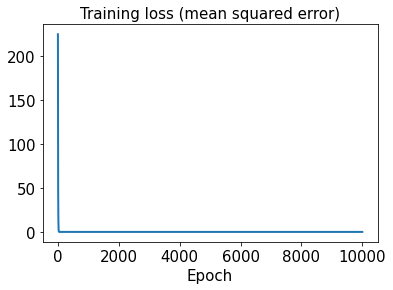

In [29]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

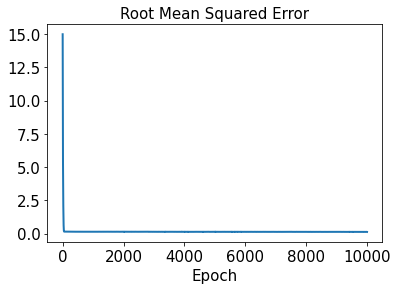

In [30]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [31]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [32]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [33]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.55534035


In [34]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.630611


In [35]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [36]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

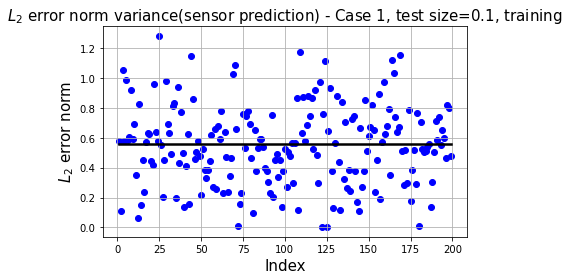

In [37]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

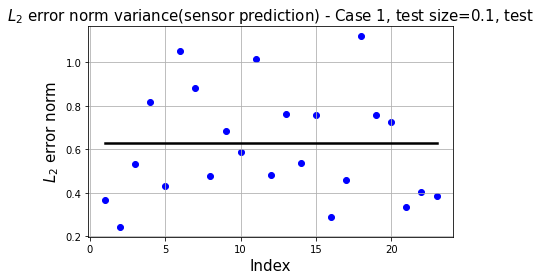

In [38]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [40]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [41]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [42]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
7/7 [==============================] - 0s 22ms/step - loss: 0.0110 - rmse: 0.1044
Epoch 2/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1039
Epoch 3/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.1034
Epoch 4/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.1027
Epoch 5/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1016
Epoch 6/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.0996
Epoch 7/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0960
Epoch 8/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0908
Epoch 9/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0867
Epoch 10/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0851
Epoch 11/10000
7/7 [============================

7/7 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0533
Epoch 87/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0530
Epoch 88/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 89/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 90/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0521
Epoch 91/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0518
Epoch 92/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0516
Epoch 93/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0513
Epoch 94/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0510
Epoch 95/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0507
Epoch 96/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 171/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 172/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0306
Epoch 173/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 174/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0302
Epoch 175/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0301
Epoch 176/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 177/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 178/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0297
Epoch 179/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0294
Epoch 180/10000
7/7 [=========================

7/7 [==============================] - 0s 5ms/step - loss: 5.6337e-04 - rmse: 0.0200
Epoch 252/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6039e-04 - rmse: 0.0199
Epoch 253/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5576e-04 - rmse: 0.0198
Epoch 254/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5212e-04 - rmse: 0.0197
Epoch 255/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5029e-04 - rmse: 0.0196
Epoch 256/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.4593e-04 - rmse: 0.0195
Epoch 257/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.4247e-04 - rmse: 0.0194
Epoch 258/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.3894e-04 - rmse: 0.0193
Epoch 259/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.3696e-04 - rmse: 0.0193
Epoch 260/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.3477e-04 - rmse: 0.0192
Epoch 

7/7 [==============================] - 0s 5ms/step - loss: 3.8364e-04 - rmse: 0.0149
Epoch 333/10000
7/7 [==============================] - 0s 5ms/step - loss: 3.8150e-04 - rmse: 0.0148
Epoch 334/10000
7/7 [==============================] - 0s 5ms/step - loss: 3.8079e-04 - rmse: 0.0148
Epoch 335/10000
7/7 [==============================] - 0s 6ms/step - loss: 3.7920e-04 - rmse: 0.0147
Epoch 336/10000
7/7 [==============================] - 0s 5ms/step - loss: 3.7770e-04 - rmse: 0.0147
Epoch 337/10000
7/7 [==============================] - 0s 5ms/step - loss: 3.7698e-04 - rmse: 0.0147
Epoch 338/10000
7/7 [==============================] - 0s 5ms/step - loss: 3.7833e-04 - rmse: 0.0147
Epoch 339/10000
7/7 [==============================] - 0s 5ms/step - loss: 3.7947e-04 - rmse: 0.0147
Epoch 340/10000
7/7 [==============================] - 0s 6ms/step - loss: 3.7722e-04 - rmse: 0.0147
Epoch 341/10000
7/7 [==============================] - 0s 6ms/step - loss: 3.7390e-04 - rmse: 0.0146
Epoch 

7/7 [==============================] - 0s 5ms/step - loss: 3.1545e-04 - rmse: 0.0125
Epoch 414/10000
7/7 [==============================] - 0s 5ms/step - loss: 3.1396e-04 - rmse: 0.0125
Epoch 415/10000
7/7 [==============================] - 0s 5ms/step - loss: 3.1301e-04 - rmse: 0.0124
Epoch 416/10000
7/7 [==============================] - 0s 6ms/step - loss: 3.1152e-04 - rmse: 0.0124
Epoch 417/10000
7/7 [==============================] - 0s 6ms/step - loss: 3.1119e-04 - rmse: 0.0124
Epoch 418/10000
7/7 [==============================] - 0s 6ms/step - loss: 3.0986e-04 - rmse: 0.0123
Epoch 419/10000
7/7 [==============================] - 0s 5ms/step - loss: 3.0879e-04 - rmse: 0.0123
Epoch 420/10000
7/7 [==============================] - 0s 6ms/step - loss: 3.0952e-04 - rmse: 0.0123
Epoch 421/10000
7/7 [==============================] - 0s 6ms/step - loss: 3.0942e-04 - rmse: 0.0123
Epoch 422/10000
7/7 [==============================] - 0s 6ms/step - loss: 3.0854e-04 - rmse: 0.0123
Epoch 

7/7 [==============================] - 0s 5ms/step - loss: 2.7489e-04 - rmse: 0.0110
Epoch 495/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.7400e-04 - rmse: 0.0109
Epoch 496/10000
7/7 [==============================] - 0s 6ms/step - loss: 2.7438e-04 - rmse: 0.0110
Epoch 497/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.7330e-04 - rmse: 0.0109
Epoch 498/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.7274e-04 - rmse: 0.0109
Epoch 499/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.7259e-04 - rmse: 0.0109
Epoch 500/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.7171e-04 - rmse: 0.0108
Epoch 501/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.7119e-04 - rmse: 0.0108
Epoch 502/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.7147e-04 - rmse: 0.0108
Epoch 503/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.7032e-04 - rmse: 0.0108
Epoch 

7/7 [==============================] - 0s 6ms/step - loss: 2.4547e-04 - rmse: 0.0098
Epoch 576/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.4632e-04 - rmse: 0.0098
Epoch 577/10000
7/7 [==============================] - 0s 6ms/step - loss: 2.4433e-04 - rmse: 0.0097
Epoch 578/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.4433e-04 - rmse: 0.0097
Epoch 579/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.4394e-04 - rmse: 0.0097
Epoch 580/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.4485e-04 - rmse: 0.0098
Epoch 581/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.4423e-04 - rmse: 0.0097
Epoch 582/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.4393e-04 - rmse: 0.0097
Epoch 583/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.4349e-04 - rmse: 0.0097
Epoch 584/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.4282e-04 - rmse: 0.0097
Epoch 

7/7 [==============================] - 0s 5ms/step - loss: 2.2297e-04 - rmse: 0.0088
Epoch 657/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.2402e-04 - rmse: 0.0089
Epoch 658/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.2243e-04 - rmse: 0.0088
Epoch 659/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.2411e-04 - rmse: 0.0089
Epoch 660/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.2340e-04 - rmse: 0.0089
Epoch 661/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.2181e-04 - rmse: 0.0088
Epoch 662/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.2139e-04 - rmse: 0.0088
Epoch 663/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.2071e-04 - rmse: 0.0087
Epoch 664/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.2008e-04 - rmse: 0.0087
Epoch 665/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.1975e-04 - rmse: 0.0087
Epoch 

7/7 [==============================] - 0s 5ms/step - loss: 2.0522e-04 - rmse: 0.0081
Epoch 738/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.0635e-04 - rmse: 0.0081
Epoch 739/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.0743e-04 - rmse: 0.0082
Epoch 740/10000
7/7 [==============================] - 0s 6ms/step - loss: 2.0681e-04 - rmse: 0.0082
Epoch 741/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.0679e-04 - rmse: 0.0082
Epoch 742/10000
7/7 [==============================] - 0s 6ms/step - loss: 2.0551e-04 - rmse: 0.0081
Epoch 743/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.0708e-04 - rmse: 0.0082
Epoch 744/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.0521e-04 - rmse: 0.0081
Epoch 745/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.0428e-04 - rmse: 0.0080
Epoch 746/10000
7/7 [==============================] - 0s 5ms/step - loss: 2.0413e-04 - rmse: 0.0080
Epoch 

7/7 [==============================] - 0s 5ms/step - loss: 1.8959e-04 - rmse: 0.0074
Epoch 819/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.8927e-04 - rmse: 0.0073
Epoch 820/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.8904e-04 - rmse: 0.0073
Epoch 821/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.8841e-04 - rmse: 0.0073
Epoch 822/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.8786e-04 - rmse: 0.0073
Epoch 823/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.8792e-04 - rmse: 0.0073
Epoch 824/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.9015e-04 - rmse: 0.0074
Epoch 825/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.8957e-04 - rmse: 0.0074
Epoch 826/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.8964e-04 - rmse: 0.0074
Epoch 827/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.8932e-04 - rmse: 0.0074
Epoch 

7/7 [==============================] - 0s 5ms/step - loss: 1.7611e-04 - rmse: 0.0067
Epoch 900/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.7605e-04 - rmse: 0.0067
Epoch 901/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.7609e-04 - rmse: 0.0067
Epoch 902/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.7658e-04 - rmse: 0.0068
Epoch 903/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.7692e-04 - rmse: 0.0068
Epoch 904/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.7684e-04 - rmse: 0.0068
Epoch 905/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.7642e-04 - rmse: 0.0068
Epoch 906/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.7639e-04 - rmse: 0.0068
Epoch 907/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.7704e-04 - rmse: 0.0068
Epoch 908/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.7632e-04 - rmse: 0.0068
Epoch 

7/7 [==============================] - 0s 5ms/step - loss: 1.6627e-04 - rmse: 0.0063
Epoch 981/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.6570e-04 - rmse: 0.0063
Epoch 982/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.6587e-04 - rmse: 0.0063
Epoch 983/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.6623e-04 - rmse: 0.0063
Epoch 984/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.6564e-04 - rmse: 0.0063
Epoch 985/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.6511e-04 - rmse: 0.0062
Epoch 986/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.6468e-04 - rmse: 0.0062
Epoch 987/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.6464e-04 - rmse: 0.0062
Epoch 988/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.6465e-04 - rmse: 0.0062
Epoch 989/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.6454e-04 - rmse: 0.0062
Epoch 

7/7 [==============================] - 0s 5ms/step - loss: 1.5635e-04 - rmse: 0.0058
Epoch 1061/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.5598e-04 - rmse: 0.0058
Epoch 1062/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.5589e-04 - rmse: 0.0058
Epoch 1063/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.5568e-04 - rmse: 0.0058
Epoch 1064/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.5561e-04 - rmse: 0.0058
Epoch 1065/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.5573e-04 - rmse: 0.0058
Epoch 1066/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.5548e-04 - rmse: 0.0058
Epoch 1067/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.5633e-04 - rmse: 0.0059
Epoch 1068/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.5653e-04 - rmse: 0.0059
Epoch 1069/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.5702e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 1.4802e-04 - rmse: 0.0054
Epoch 1141/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4759e-04 - rmse: 0.0054
Epoch 1142/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4745e-04 - rmse: 0.0054
Epoch 1143/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4888e-04 - rmse: 0.0055
Epoch 1144/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4858e-04 - rmse: 0.0055
Epoch 1145/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4837e-04 - rmse: 0.0055
Epoch 1146/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4776e-04 - rmse: 0.0055
Epoch 1147/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4761e-04 - rmse: 0.0054
Epoch 1148/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4743e-04 - rmse: 0.0054
Epoch 1149/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4702e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 1.4129e-04 - rmse: 0.0052
Epoch 1221/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.4165e-04 - rmse: 0.0052
Epoch 1222/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4105e-04 - rmse: 0.0052
Epoch 1223/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4086e-04 - rmse: 0.0052
Epoch 1224/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4176e-04 - rmse: 0.0052
Epoch 1225/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4157e-04 - rmse: 0.0052
Epoch 1226/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4141e-04 - rmse: 0.0052
Epoch 1227/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4121e-04 - rmse: 0.0052
Epoch 1228/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4149e-04 - rmse: 0.0052
Epoch 1229/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.4039e-04 - rmse: 0.00

7/7 [==============================] - 0s 6ms/step - loss: 1.3469e-04 - rmse: 0.0049
Epoch 1301/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.3487e-04 - rmse: 0.0049
Epoch 1302/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.3499e-04 - rmse: 0.0049
Epoch 1303/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.3574e-04 - rmse: 0.0050
Epoch 1304/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.3524e-04 - rmse: 0.0050
Epoch 1305/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.3477e-04 - rmse: 0.0049
Epoch 1306/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.3457e-04 - rmse: 0.0049
Epoch 1307/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.3410e-04 - rmse: 0.0049
Epoch 1308/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.3347e-04 - rmse: 0.0048
Epoch 1309/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.3432e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 1.2888e-04 - rmse: 0.0046
Epoch 1381/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2869e-04 - rmse: 0.0046
Epoch 1382/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2858e-04 - rmse: 0.0046
Epoch 1383/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2882e-04 - rmse: 0.0047
Epoch 1384/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2881e-04 - rmse: 0.0047
Epoch 1385/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2867e-04 - rmse: 0.0046
Epoch 1386/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2864e-04 - rmse: 0.0046
Epoch 1387/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.2895e-04 - rmse: 0.0047
Epoch 1388/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2847e-04 - rmse: 0.0046
Epoch 1389/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.2803e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 1.2245e-04 - rmse: 0.0043
Epoch 1461/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2260e-04 - rmse: 0.0043
Epoch 1462/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2233e-04 - rmse: 0.0043
Epoch 1463/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.2274e-04 - rmse: 0.0044
Epoch 1464/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2265e-04 - rmse: 0.0043
Epoch 1465/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.2298e-04 - rmse: 0.0044
Epoch 1466/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.2261e-04 - rmse: 0.0044
Epoch 1467/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.2255e-04 - rmse: 0.0043
Epoch 1468/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.2268e-04 - rmse: 0.0044
Epoch 1469/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.2237e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 1.1870e-04 - rmse: 0.0042
Epoch 1541/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1892e-04 - rmse: 0.0043
Epoch 1542/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1872e-04 - rmse: 0.0043
Epoch 1543/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1832e-04 - rmse: 0.0042
Epoch 1544/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1875e-04 - rmse: 0.0043
Epoch 1545/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1856e-04 - rmse: 0.0042
Epoch 1546/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1800e-04 - rmse: 0.0042
Epoch 1547/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1769e-04 - rmse: 0.0042
Epoch 1548/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.1839e-04 - rmse: 0.0042
Epoch 1549/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1851e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 1.1410e-04 - rmse: 0.0041
Epoch 1621/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.1367e-04 - rmse: 0.0040
Epoch 1622/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1422e-04 - rmse: 0.0041
Epoch 1623/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.1474e-04 - rmse: 0.0042
Epoch 1624/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1433e-04 - rmse: 0.0041
Epoch 1625/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1393e-04 - rmse: 0.0041
Epoch 1626/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1373e-04 - rmse: 0.0040
Epoch 1627/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1361e-04 - rmse: 0.0040
Epoch 1628/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1349e-04 - rmse: 0.0040
Epoch 1629/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1355e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 1.0959e-04 - rmse: 0.0039
Epoch 1701/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0979e-04 - rmse: 0.0039
Epoch 1702/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1057e-04 - rmse: 0.0040
Epoch 1703/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1113e-04 - rmse: 0.0041
Epoch 1704/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1056e-04 - rmse: 0.0040
Epoch 1705/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0989e-04 - rmse: 0.0039
Epoch 1706/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.1014e-04 - rmse: 0.0040
Epoch 1707/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0989e-04 - rmse: 0.0039
Epoch 1708/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0969e-04 - rmse: 0.0039
Epoch 1709/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0915e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 1.0553e-04 - rmse: 0.0037
Epoch 1781/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0559e-04 - rmse: 0.0037
Epoch 1782/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0587e-04 - rmse: 0.0037
Epoch 1783/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0564e-04 - rmse: 0.0037
Epoch 1784/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0515e-04 - rmse: 0.0037
Epoch 1785/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0498e-04 - rmse: 0.0036
Epoch 1786/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0481e-04 - rmse: 0.0036
Epoch 1787/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0485e-04 - rmse: 0.0036
Epoch 1788/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0558e-04 - rmse: 0.0037
Epoch 1789/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0551e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 1.0166e-04 - rmse: 0.0035
Epoch 1861/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0155e-04 - rmse: 0.0035
Epoch 1862/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0200e-04 - rmse: 0.0036
Epoch 1863/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0191e-04 - rmse: 0.0036
Epoch 1864/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0237e-04 - rmse: 0.0036
Epoch 1865/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0227e-04 - rmse: 0.0036
Epoch 1866/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0227e-04 - rmse: 0.0036
Epoch 1867/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0197e-04 - rmse: 0.0036
Epoch 1868/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0145e-04 - rmse: 0.0035
Epoch 1869/10000
7/7 [==============================] - 0s 5ms/step - loss: 1.0153e-04 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 9.9204e-05 - rmse: 0.0035
Epoch 1941/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.8814e-05 - rmse: 0.0035
Epoch 1942/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.8298e-05 - rmse: 0.0034
Epoch 1943/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.8323e-05 - rmse: 0.0034
Epoch 1944/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.8134e-05 - rmse: 0.0034
Epoch 1945/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.8131e-05 - rmse: 0.0034
Epoch 1946/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.8130e-05 - rmse: 0.0034
Epoch 1947/10000
7/7 [==============================] - 0s 6ms/step - loss: 9.8700e-05 - rmse: 0.0035
Epoch 1948/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.8849e-05 - rmse: 0.0035
Epoch 1949/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.8526e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 9.5179e-05 - rmse: 0.0033
Epoch 2021/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.5281e-05 - rmse: 0.0033
Epoch 2022/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.5169e-05 - rmse: 0.0033
Epoch 2023/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.5257e-05 - rmse: 0.0033
Epoch 2024/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.5813e-05 - rmse: 0.0034
Epoch 2025/10000
7/7 [==============================] - 0s 6ms/step - loss: 9.5533e-05 - rmse: 0.0034
Epoch 2026/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.5211e-05 - rmse: 0.0033
Epoch 2027/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.5062e-05 - rmse: 0.0033
Epoch 2028/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.5869e-05 - rmse: 0.0035
Epoch 2029/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.5580e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 9.3014e-05 - rmse: 0.0033
Epoch 2101/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.2854e-05 - rmse: 0.0033
Epoch 2102/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.2520e-05 - rmse: 0.0033
Epoch 2103/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.3010e-05 - rmse: 0.0034
Epoch 2104/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.2876e-05 - rmse: 0.0033
Epoch 2105/10000
7/7 [==============================] - 0s 6ms/step - loss: 9.2623e-05 - rmse: 0.0033
Epoch 2106/10000
7/7 [==============================] - 0s 6ms/step - loss: 9.2259e-05 - rmse: 0.0033
Epoch 2107/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.2363e-05 - rmse: 0.0033
Epoch 2108/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.2402e-05 - rmse: 0.0033
Epoch 2109/10000
7/7 [==============================] - 0s 5ms/step - loss: 9.2402e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 9.0600e-05 - rmse: 0.0033
Epoch 2181/10000
7/7 [==============================] - 0s 6ms/step - loss: 9.0364e-05 - rmse: 0.0033
Epoch 2182/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.9985e-05 - rmse: 0.0032
Epoch 2183/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.9763e-05 - rmse: 0.0032
Epoch 2184/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.9532e-05 - rmse: 0.0032
Epoch 2185/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.9626e-05 - rmse: 0.0032
Epoch 2186/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.9656e-05 - rmse: 0.0032
Epoch 2187/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.9267e-05 - rmse: 0.0031
Epoch 2188/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.9337e-05 - rmse: 0.0032
Epoch 2189/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.9387e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 8.6653e-05 - rmse: 0.0030
Epoch 2261/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.6789e-05 - rmse: 0.0031
Epoch 2262/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.6762e-05 - rmse: 0.0031
Epoch 2263/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.6949e-05 - rmse: 0.0031
Epoch 2264/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.6879e-05 - rmse: 0.0031
Epoch 2265/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.6849e-05 - rmse: 0.0031
Epoch 2266/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.6975e-05 - rmse: 0.0031
Epoch 2267/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.7433e-05 - rmse: 0.0032
Epoch 2268/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.6885e-05 - rmse: 0.0031
Epoch 2269/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.6836e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 8.5933e-05 - rmse: 0.0033
Epoch 2341/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.5944e-05 - rmse: 0.0033
Epoch 2342/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.5173e-05 - rmse: 0.0031
Epoch 2343/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.5146e-05 - rmse: 0.0031
Epoch 2344/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.5234e-05 - rmse: 0.0032
Epoch 2345/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.5610e-05 - rmse: 0.0032
Epoch 2346/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.5590e-05 - rmse: 0.0032
Epoch 2347/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.5370e-05 - rmse: 0.0032
Epoch 2348/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.4683e-05 - rmse: 0.0031
Epoch 2349/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.5158e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 8.4066e-05 - rmse: 0.0033
Epoch 2421/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.3476e-05 - rmse: 0.0032
Epoch 2422/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.3232e-05 - rmse: 0.0031
Epoch 2423/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.3953e-05 - rmse: 0.0033
Epoch 2424/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.3137e-05 - rmse: 0.0031
Epoch 2425/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.2841e-05 - rmse: 0.0031
Epoch 2426/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.2372e-05 - rmse: 0.0030
Epoch 2427/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.2102e-05 - rmse: 0.0030
Epoch 2428/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.1950e-05 - rmse: 0.0030
Epoch 2429/10000
7/7 [==============================] - 0s 5ms/step - loss: 8.2066e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 8.0050e-05 - rmse: 0.0029
Epoch 2501/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.9933e-05 - rmse: 0.0029
Epoch 2502/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.9754e-05 - rmse: 0.0029
Epoch 2503/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.9627e-05 - rmse: 0.0029
Epoch 2504/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.9464e-05 - rmse: 0.0028
Epoch 2505/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.9474e-05 - rmse: 0.0028
Epoch 2506/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.9347e-05 - rmse: 0.0028
Epoch 2507/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.9284e-05 - rmse: 0.0028
Epoch 2508/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.9480e-05 - rmse: 0.0029
Epoch 2509/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.9535e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 7.7766e-05 - rmse: 0.0028
Epoch 2581/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.8416e-05 - rmse: 0.0030
Epoch 2582/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.8379e-05 - rmse: 0.0030
Epoch 2583/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.8280e-05 - rmse: 0.0029
Epoch 2584/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.7932e-05 - rmse: 0.0029
Epoch 2585/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.7780e-05 - rmse: 0.0029
Epoch 2586/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.8339e-05 - rmse: 0.0030
Epoch 2587/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.8415e-05 - rmse: 0.0030
Epoch 2588/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.8459e-05 - rmse: 0.0030
Epoch 2589/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.8118e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 7.6067e-05 - rmse: 0.0028
Epoch 2661/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.6117e-05 - rmse: 0.0029
Epoch 2662/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.6184e-05 - rmse: 0.0029
Epoch 2663/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.5992e-05 - rmse: 0.0028
Epoch 2664/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.5803e-05 - rmse: 0.0028
Epoch 2665/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.5445e-05 - rmse: 0.0028
Epoch 2666/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.5506e-05 - rmse: 0.0028
Epoch 2667/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.5580e-05 - rmse: 0.0028
Epoch 2668/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.5646e-05 - rmse: 0.0028
Epoch 2669/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.5778e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 7.4055e-05 - rmse: 0.0028
Epoch 2741/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.3831e-05 - rmse: 0.0027
Epoch 2742/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.4217e-05 - rmse: 0.0028
Epoch 2743/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.3986e-05 - rmse: 0.0028
Epoch 2744/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.4009e-05 - rmse: 0.0028
Epoch 2745/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.4243e-05 - rmse: 0.0028
Epoch 2746/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.5549e-05 - rmse: 0.0031
Epoch 2747/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.5245e-05 - rmse: 0.0030
Epoch 2748/10000
7/7 [==============================] - 0s 6ms/step - loss: 7.5042e-05 - rmse: 0.0030
Epoch 2749/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.5031e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 7.3099e-05 - rmse: 0.0029
Epoch 2821/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.2934e-05 - rmse: 0.0029
Epoch 2822/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.3041e-05 - rmse: 0.0029
Epoch 2823/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.2983e-05 - rmse: 0.0029
Epoch 2824/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.2813e-05 - rmse: 0.0029
Epoch 2825/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.2688e-05 - rmse: 0.0028
Epoch 2826/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.3011e-05 - rmse: 0.0029
Epoch 2827/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.2503e-05 - rmse: 0.0028
Epoch 2828/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.2182e-05 - rmse: 0.0028
Epoch 2829/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.2050e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 7.0691e-05 - rmse: 0.0027
Epoch 2901/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.1198e-05 - rmse: 0.0028
Epoch 2902/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.1029e-05 - rmse: 0.0028
Epoch 2903/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.0807e-05 - rmse: 0.0028
Epoch 2904/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.0559e-05 - rmse: 0.0027
Epoch 2905/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.1295e-05 - rmse: 0.0029
Epoch 2906/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.1015e-05 - rmse: 0.0028
Epoch 2907/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.1281e-05 - rmse: 0.0029
Epoch 2908/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.1684e-05 - rmse: 0.0029
Epoch 2909/10000
7/7 [==============================] - 0s 5ms/step - loss: 7.1256e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 6.9014e-05 - rmse: 0.0027
Epoch 2981/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.8782e-05 - rmse: 0.0026
Epoch 2982/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.8885e-05 - rmse: 0.0027
Epoch 2983/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.9135e-05 - rmse: 0.0027
Epoch 2984/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.9150e-05 - rmse: 0.0027
Epoch 2985/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.9106e-05 - rmse: 0.0027
Epoch 2986/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.9215e-05 - rmse: 0.0027
Epoch 2987/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.9059e-05 - rmse: 0.0027
Epoch 2988/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.8817e-05 - rmse: 0.0027
Epoch 2989/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.8727e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 6.7967e-05 - rmse: 0.0027
Epoch 3061/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.7701e-05 - rmse: 0.0027
Epoch 3062/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.7634e-05 - rmse: 0.0027
Epoch 3063/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.7628e-05 - rmse: 0.0027
Epoch 3064/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.7148e-05 - rmse: 0.0026
Epoch 3065/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.7628e-05 - rmse: 0.0027
Epoch 3066/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.7373e-05 - rmse: 0.0026
Epoch 3067/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.7142e-05 - rmse: 0.0026
Epoch 3068/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.7214e-05 - rmse: 0.0026
Epoch 3069/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.7091e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 6.6381e-05 - rmse: 0.0027
Epoch 3141/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.6097e-05 - rmse: 0.0026
Epoch 3142/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.5832e-05 - rmse: 0.0026
Epoch 3143/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.5797e-05 - rmse: 0.0026
Epoch 3144/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.6460e-05 - rmse: 0.0027
Epoch 3145/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.5983e-05 - rmse: 0.0026
Epoch 3146/10000
7/7 [==============================] - 0s 6ms/step - loss: 6.5859e-05 - rmse: 0.0026
Epoch 3147/10000
7/7 [==============================] - 0s 6ms/step - loss: 6.5679e-05 - rmse: 0.0026
Epoch 3148/10000
7/7 [==============================] - 0s 6ms/step - loss: 6.6093e-05 - rmse: 0.0027
Epoch 3149/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.6535e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 6.5673e-05 - rmse: 0.0028
Epoch 3221/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.5936e-05 - rmse: 0.0028
Epoch 3222/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.6716e-05 - rmse: 0.0030
Epoch 3223/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.6251e-05 - rmse: 0.0029
Epoch 3224/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.5281e-05 - rmse: 0.0027
Epoch 3225/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.5002e-05 - rmse: 0.0027
Epoch 3226/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.4883e-05 - rmse: 0.0027
Epoch 3227/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.4373e-05 - rmse: 0.0026
Epoch 3228/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.4251e-05 - rmse: 0.0025
Epoch 3229/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.4208e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 6.6320e-05 - rmse: 0.0031
Epoch 3301/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.4954e-05 - rmse: 0.0029
Epoch 3302/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.6218e-05 - rmse: 0.0031
Epoch 3303/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.6599e-05 - rmse: 0.0032
Epoch 3304/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.6135e-05 - rmse: 0.0031
Epoch 3305/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.6136e-05 - rmse: 0.0031
Epoch 3306/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.5529e-05 - rmse: 0.0030
Epoch 3307/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.4508e-05 - rmse: 0.0028
Epoch 3308/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.4675e-05 - rmse: 0.0028
Epoch 3309/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.4105e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 6.2129e-05 - rmse: 0.0026
Epoch 3381/10000
7/7 [==============================] - 0s 6ms/step - loss: 6.2257e-05 - rmse: 0.0026
Epoch 3382/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.2055e-05 - rmse: 0.0025
Epoch 3383/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.2034e-05 - rmse: 0.0025
Epoch 3384/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1741e-05 - rmse: 0.0025
Epoch 3385/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1605e-05 - rmse: 0.0025
Epoch 3386/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1779e-05 - rmse: 0.0025
Epoch 3387/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1664e-05 - rmse: 0.0025
Epoch 3388/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1316e-05 - rmse: 0.0024
Epoch 3389/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1189e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 6.0778e-05 - rmse: 0.0025
Epoch 3461/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.0922e-05 - rmse: 0.0025
Epoch 3462/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1175e-05 - rmse: 0.0026
Epoch 3463/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.0766e-05 - rmse: 0.0025
Epoch 3464/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1632e-05 - rmse: 0.0027
Epoch 3465/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1604e-05 - rmse: 0.0027
Epoch 3466/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1564e-05 - rmse: 0.0027
Epoch 3467/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1197e-05 - rmse: 0.0026
Epoch 3468/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1759e-05 - rmse: 0.0027
Epoch 3469/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.1820e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 6.0048e-05 - rmse: 0.0026
Epoch 3541/10000
7/7 [==============================] - 0s 6ms/step - loss: 5.9640e-05 - rmse: 0.0025
Epoch 3542/10000
7/7 [==============================] - 0s 6ms/step - loss: 5.9707e-05 - rmse: 0.0025
Epoch 3543/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9866e-05 - rmse: 0.0025
Epoch 3544/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9208e-05 - rmse: 0.0024
Epoch 3545/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9153e-05 - rmse: 0.0024
Epoch 3546/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9124e-05 - rmse: 0.0024
Epoch 3547/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9208e-05 - rmse: 0.0024
Epoch 3548/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9473e-05 - rmse: 0.0025
Epoch 3549/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9068e-05 - rmse: 0.00

7/7 [==============================] - 0s 6ms/step - loss: 5.9278e-05 - rmse: 0.0026
Epoch 3621/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9581e-05 - rmse: 0.0027
Epoch 3622/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.4104e-05 - rmse: 0.0034
Epoch 3623/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.3880e-05 - rmse: 0.0034
Epoch 3624/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.2460e-05 - rmse: 0.0032
Epoch 3625/10000
7/7 [==============================] - 0s 5ms/step - loss: 6.0714e-05 - rmse: 0.0029
Epoch 3626/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9809e-05 - rmse: 0.0027
Epoch 3627/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9493e-05 - rmse: 0.0027
Epoch 3628/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.9019e-05 - rmse: 0.0026
Epoch 3629/10000
7/7 [==============================] - 0s 6ms/step - loss: 5.9152e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 5.7197e-05 - rmse: 0.0024
Epoch 3701/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.7047e-05 - rmse: 0.0024
Epoch 3702/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6989e-05 - rmse: 0.0024
Epoch 3703/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.7031e-05 - rmse: 0.0024
Epoch 3704/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6742e-05 - rmse: 0.0023
Epoch 3705/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6825e-05 - rmse: 0.0023
Epoch 3706/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6724e-05 - rmse: 0.0023
Epoch 3707/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.7046e-05 - rmse: 0.0024
Epoch 3708/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.7369e-05 - rmse: 0.0024
Epoch 3709/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.7504e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 5.6403e-05 - rmse: 0.0024
Epoch 3781/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6119e-05 - rmse: 0.0024
Epoch 3782/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5843e-05 - rmse: 0.0023
Epoch 3783/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6294e-05 - rmse: 0.0024
Epoch 3784/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6364e-05 - rmse: 0.0024
Epoch 3785/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6364e-05 - rmse: 0.0024
Epoch 3786/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6229e-05 - rmse: 0.0024
Epoch 3787/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.6009e-05 - rmse: 0.0023
Epoch 3788/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5672e-05 - rmse: 0.0023
Epoch 3789/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5567e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 5.4931e-05 - rmse: 0.0023
Epoch 3861/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.4690e-05 - rmse: 0.0022
Epoch 3862/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.4806e-05 - rmse: 0.0023
Epoch 3863/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5176e-05 - rmse: 0.0023
Epoch 3864/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5146e-05 - rmse: 0.0023
Epoch 3865/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5018e-05 - rmse: 0.0023
Epoch 3866/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5510e-05 - rmse: 0.0024
Epoch 3867/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5207e-05 - rmse: 0.0024
Epoch 3868/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5081e-05 - rmse: 0.0023
Epoch 3869/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5066e-05 - rmse: 0.00

7/7 [==============================] - 0s 6ms/step - loss: 5.4348e-05 - rmse: 0.0024
Epoch 3941/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.4155e-05 - rmse: 0.0023
Epoch 3942/10000
7/7 [==============================] - 0s 6ms/step - loss: 5.4141e-05 - rmse: 0.0023
Epoch 3943/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.4402e-05 - rmse: 0.0024
Epoch 3944/10000
7/7 [==============================] - 0s 6ms/step - loss: 5.4470e-05 - rmse: 0.0024
Epoch 3945/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.4566e-05 - rmse: 0.0024
Epoch 3946/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5068e-05 - rmse: 0.0025
Epoch 3947/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5415e-05 - rmse: 0.0026
Epoch 3948/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.5675e-05 - rmse: 0.0026
Epoch 3949/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.4965e-05 - rmse: 0.00

7/7 [==============================] - 0s 5ms/step - loss: 5.3589e-05 - rmse: 0.0024
Epoch 4021/10000
7/7 [==============================] - 0s 6ms/step - loss: 5.3260e-05 - rmse: 0.0023
Epoch 4022/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.3573e-05 - rmse: 0.0024
Epoch 4023/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.3521e-05 - rmse: 0.0024
Epoch 4024/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.3395e-05 - rmse: 0.0023
Epoch 4025/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.3510e-05 - rmse: 0.0024
Epoch 4026/10000
7/7 [==============================] - 0s 6ms/step - loss: 5.3298e-05 - rmse: 0.0023
Epoch 4027/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.3193e-05 - rmse: 0.0023
Epoch 4028/10000
7/7 [==============================] - 0s 5ms/step - loss: 5.3020e-05 - rmse: 0.0023
Epoch 4029/10000
7/7 [==============================] - 0s 6ms/step - loss: 5.3148e-05 - rmse: 0.00

KeyboardInterrupt: 

In [ ]:
time = end - start
print("Training time:", time)

In [ ]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
test_results = sd.evaluate(x_train)

In [ ]:
decoded_train = sd.predict(decoded_sensor_train)

In [ ]:
decoded_test = sd.predict(decoded_sensor_test)

In [ ]:
error_train_abs = np.abs(decoded_train - y_train)

In [ ]:
error_test_abs = np.abs(decoded_test - y_test)

In [ ]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

In [ ]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

In [ ]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

In [ ]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

In [ ]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

In [ ]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()